In [0]:
!pip install atspy

     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 1.5MB 20.9MB/s 
     |████████████████████████████████| 163kB 52.4MB/s 
     |████████████████████████████████| 28.4MB 106kB/s 
     |████████████████████████████████| 327kB 63.5MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 81kB 13.8MB/s 
     |████████████████████████████████| 235kB 76.7MB/s 
     |████████████████████████████████| 20.0MB 1.2MB/s 
     |████████████████████████████████| 174kB 65.9MB/s 
     |████████████████████████████████| 71kB 13.1MB/s 
     |████████████████████████████████| 112kB 66.9MB/s 
     |████████████████████████████████| 194kB 65.2MB/s 
     |████████████████████████████████| 7.5MB 58.1MB/s 
  Created wheel for atspy: filename=atspy-0.0.9-cp36-none-any.whl size=67575 sha256=1035faa251c802c39059296b5e41d1bf149e43603a58bf466ff349ae5eff38d8
  Stored in directo

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/firmai/random-assets-two/master/ts/monthly-beer-australia.csv")
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Megaliters
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [0]:
from atspy import AutomatedModel

INFO:root:Using CPU


In [0]:
1. ARIMA - Automated ARIMA Modelling
1. Prophet - Modeling Multiple Seasonality With Linear or Non-linear Growth
1. HWAAS - Exponential Smoothing With Additive Trend and Additive Seasonality
1. HWAMS - Exponential Smoothing with Additive Trend and Multiplicative Seasonality
1. PYAF - Feature Generating Model (slow and underforms)
1. NBEATS -  Neural basis expansion analysis (now fixed at 20 Epochs)
1. Gluonts - RNN-based Model (now fixed at 20 Epochs)
1. TATS - Seasonal and Trend no Box Cox
1. TBAT - Trend and Box Cox
1. TBATS1 - Trend, Seasonal (one), and Box Cox
1. TBATP1 - TBATS1 but Seasonal Inference is Hardcoded by Periodicity
1. TBATS2 - TBATS1 With Two Seasonal Periods

In [0]:
model_list=["HWAMS","HWAAS","TBAT"]

am = AutomatedModel(df = df , model_list=model_list, season="infer_from_data",forecast_len=60 )
forecast_in, performance = am.forecast_insample()
forecast_out = am.forecast_outsample()
all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
357
An insample split of training size 357 and testing size 119 has been constructed
Model HWAMS is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model TBAT is being trained for in sample prediction
Model HWAMS is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model HWAMS is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model TBAT is being trained for out of sample prediction
Model HWAMS is being used to forcast out of sample
Model HWAAS is being used to forcast out 

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


305  variables are found to be almost constant


 'HWAAS__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'HWAAS__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'TBAT__fft_coefficient__coeff_9__attr_"imag"'
 'TBAT__fft_coefficient__coeff_9__attr_"real"'
 'TBAT__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble


In [0]:
forecast_in.head()

,Target,HWAMS,HWAAS,TBAT
Date,,,,
1985-10-01,181.6,161.962148,162.391653,148.410071
1985-11-01,182.0,174.688055,173.191756,147.999237
1985-12-01,190.0,189.728744,187.649575,147.589541
1986-01-01,161.2,155.077205,154.817215,147.180980
1986-02-01,155.5,148.054292,147.477692,146.773549


In [8]:
forecast_out.head()

,HWAMS,HWAAS,TBAT
Date,,,
1995-09-01,137.518755,137.133938,142.906275
1995-10-01,164.136220,165.079612,142.865575
1995-11-01,178.671684,180.009560,142.827110
1995-12-01,184.175954,185.715043,142.790757
1996-01-01,147.166448,147.440026,142.756399


In [0]:
performance

,Target,HWAMS,HWAAS,TBAT
rmse,0.000000,17.599400,18.993827,36.538009
mse,0.000000,309.738878,360.765452,1335.026136
mean,155.293277,142.399639,140.577496,126.590412


In [0]:
all_performance

,rmse,mse,mean
ensemble_lgb__X__HWAMS,9.697588,94.043213,146.719412
ensemble_lgb__X__HWAMS__X__HWAMS_HWAAS__X__ensemble_ts__X__HWAAS,9.875212,97.519817,145.250837
ensemble_lgb__X__HWAMS__X__HWAMS_HWAAS,11.127326,123.817378,142.994374
ensemble_lgb,12.748526,162.524907,156.487208
ensemble_lgb__X__HWAMS__X__HWAMS_HWAAS__X__ensemble_ts__X__HWAAS__X__HWAMS_HWAAS_TBAT__X__TBAT,14.589155,212.843442,138.615567
HWAMS,15.567905,242.359663,136.951615
HWAMS_HWAAS,16.651370,277.268110,135.544299
ensemble_ts,17.255107,297.738716,163.134079
HWAAS,17.804066,316.984751,134.136983
HWAMS_HWAAS_TBAT,23.358758,545.631579,128.785846


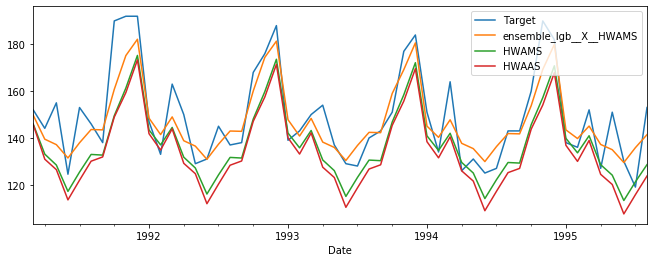

In [0]:
all_ensemble_in[["Target","ensemble_lgb__X__HWAMS","HWAMS","HWAAS"]].plot()

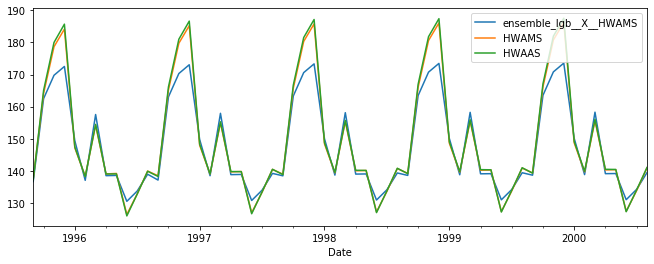

In [0]:
all_ensemble_out[["ensemble_lgb__X__HWAMS","HWAMS","HWAAS"]].plot()

In [0]:
am.models_dict_in

{'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f42f7822d30>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f42f77fff60>,
 'TBAT': <tbats.tbats.Model.Model at 0x7f42d3aab048>}

In [0]:
am.models_dict_out

{'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f9c01309278>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f9c01309cf8>,
 'TBAT': <tbats.tbats.Model.Model at 0x7f9c08f18ba8>}